# Modelado Estocástico
## Clase 6 - Ejercitación 5

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Generamos los 100 números aleatorios ("ruido blanco") con distribución normal estándar.

In [2]:
n = 100
aleatorios = np.random.standard_normal(n)

### Generamos los procesos AR(1) con los valores indicados.

Es decir el proceso:

 $y_t = 0.5  y_{t-1} + \epsilon_t$

 y el proceso:

  $y_t = 0.9  y_{t-1} + \epsilon_t$


 Con $\epsilon_t$ corresponde a los valores de ruidos blanco generados previamente. El valor inicial será $y_1 = \epsilon_1$

In [3]:
def proceso_ar(rho, y_prev, error):
    return rho * y_prev + error

In [4]:
def simular_proceso_ar(rho, n):
    y = np.zeros(n)
    y[0] = aleatorios[0]
    for i in range(1, n):
        error = aleatorios[i]
        y[i] = proceso_ar(rho, y[i-1], error)
    return y

In [5]:
rho = 0.5
ar_0_5 = simular_proceso_ar(rho, n)
rho2 = 0.9
ar_0_9 = simular_proceso_ar(rho2, n)

Para facilitar la visualización, generamos un df con las tres columnas generadas:

In [6]:
df = pd.DataFrame({'white_noise':aleatorios,'AR(1)0.5':ar_0_5,'AR(1)0.9':ar_0_9})
df.head()

,white_noise,AR(1)0.5,AR(1)0.9
0,-0.304089,-0.304089,-0.304089
1,0.509204,0.357160,0.235524
2,1.042422,1.221002,1.254394
3,-0.245040,0.365461,0.883915
4,-0.499235,-0.316504,0.296288


### Graficamos:

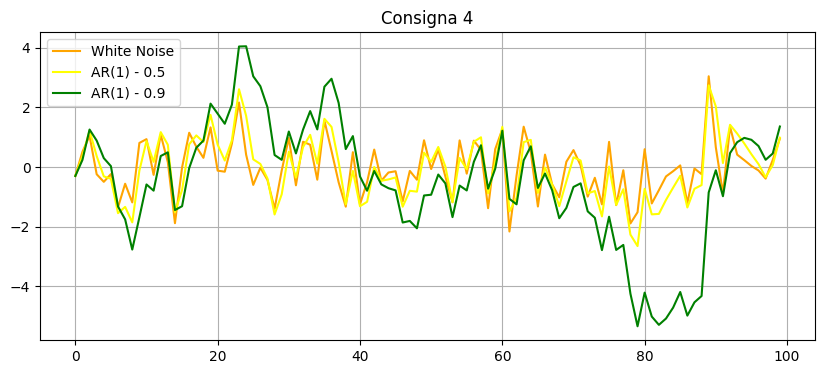

In [7]:
plt.figure(figsize=(10, 4))
plt.plot(df["white_noise"], label="White Noise", color='orange')
plt.plot(df["AR(1)0.5"], label="AR(1) - 0.5", color='yellow')
plt.plot(df["AR(1)0.9"], label="AR(1) - 0.9", color='green')

plt.title("Consigna 4")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
print(f"Media de white noise: {df['white_noise'].mean()} \nMedia de AR(1) 0.5: {df['AR(1)0.5'].mean()} \nMedia de AR(1) 0.9: {df['AR(1)0.9'].mean()}")

Media de white noise: -0.037392769369386514 
Media de AR(1) 0.5: -0.08460869269927794 
Media de AR(1) 0.9: -0.4960102601329793


5. No notamos cambios significativos en el gráfico al realizar diferentes simulaciones.

6. Los 3 procesos tienen media $\approx 0$.
El ruido blanco, basicamente por definición.
Y los dos AR(1), (recuerden de la clase que los podemos escribir como un MA infinito, y cada uno de los epsilon tiene esperanza cero) tendrán media
igual a cero. Noten que si hubiera una constante "c" en el AR(1), la media ya no sería 0. Pero sería constante. Si el proceso autorregresivo es débilmente estacionario, entonces la media existe.
En el gráfico podemos apreciar que estos procesos si bien pueden distanciarse de la media, en el tiempo retornan a la media.